In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi
import sys

from theano import tensor as tt
import theano as th
from lasagne.updates import adam

sys.path.append('../')
from meanfield.meanfield import *
from meanfield.layers.input import *
from meanfield.layers.dense import *
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.datasets import make_moons

In [2]:
Network.sample_size = 10
Network.target_std_deviation = 0.1 #this feature doesn't affect anything in case of classification
Dense.initial_sigma = -4 #the initial std deviation of weights will be e^-5. 
                        #Higher initial deviation leads to unability to train big networks?

In [4]:
X, y = make_moons(n_samples=1000, noise=0.2)

In [5]:
stdx = StandardScaler()
X = stdx.fit(X).transform(X)

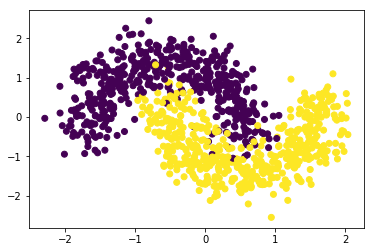

In [6]:
cmap = y
plt.scatter(x=X[:,0],y=X[:,1], c=cmap)
plt.show()

In [7]:
y = OneHotEncoder().fit(y.reshape((-1,1))).transform(y.reshape((-1,1))).toarray()

In [8]:
X, y = np.array(X), np.array(y)

In [9]:
X.shape, y.shape

((1000, 2), (1000, 2))

In [10]:
inp = Input(2)

d1 = Dense(200, inp, prior=150)
d2 = Dense(200, d1, prior=160)
d3 = Dense(30, d2, prior=160)

out = Dense(2, d3, act=tt.nnet.softmax, prior=200)

Reshape{3}.0
Reshape{3}.0
Reshape{3}.0
Reshape{3}.0


In [11]:
model = Model(input=inp, output=out, loss='crossentropy', init_value_loss_repar=1.6)

In [12]:
for _ in range(760):
    model.fit(X=X, y=y, batchsize=100, nepoch=80, log_freq=80, shuffle_freq=40)
    if _ % 10 == 0:
        print(d1.sigma.eval())

epoch: 0 
  train error: 0.5 
  objective: 15183.50296436619
  loss_scale: 0.9308615796566533





KeyboardInterrupt



In [31]:
samplesize = 10

In [32]:
base = np.linspace(start=-8, stop=8, num=50, dtype='float32')
X_test = np.array([[x,y] for x in base for y in base])
y_pred = model.predict(X_test, prediction_sample_size=samplesize, return_distrib=False, batchsize=3)

100%|█████████▉| 99.99999999999866/100 [00:48<00:00,  2.06it/s]    


In [35]:
pr = y_pred[:,0].reshape((50,50))

/home/nikita/anaconda2/envs/py3.5/lib/python3.5/site-packages/matplotlib/colors.py:823: UserWarning: Warning: converting a masked element to nan.
  dtype = np.min_scalar_type(value)
/home/nikita/anaconda2/envs/py3.5/lib/python3.5/site-packages/numpy/ma/core.py:2809: UserWarning: Warning: converting a masked element to nan.
  order=order, subok=True, ndmin=ndmin)


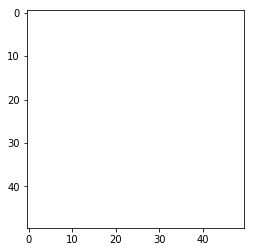

In [36]:
plt.imshow(pr)
plt.show()

In [38]:
y_pred

array([[ nan,  nan],
       [ nan,  nan],
       [ nan,  nan],
       ..., 
       [ nan,  nan],
       [ nan,  nan],
       [ nan,  nan]])